In [9]:
import pandas as pd
# from pyproj import Proj, transform #If you want to try projecting lat lon

In [ ]:
spray = pd.read_csv('../input/spray.csv')

In [8]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [4]:
spray.describe()

,Latitude,Longitude
count,14835.000000,14835.000000
mean,41.904828,-87.736690
std,0.104381,0.067292
min,41.713925,-88.096468
25%,41.785001,-87.794225
50%,41.940075,-87.727853
75%,41.980978,-87.694108
max,42.395983,-87.586727


In [11]:
spray.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14835 entries, 0 to 14834
Data columns (total 4 columns):
Date         14835 non-null object
Time         14251 non-null object
Latitude     14835 non-null float64
Longitude    14835 non-null float64
dtypes: float64(2), object(2)
memory usage: 463.7+ KB


In [15]:
def eda(dataframe):
    print;print "missing values \n", dataframe.isnull().sum()
    print;print "dataframe index \n", dataframe.index
    print;print "dataframe types \n", dataframe.dtypes
    print;print "dataframe shape \n", dataframe.shape
    print;print "dataframe describe \n", dataframe.describe()
    print "Unique count"
    for item in dataframe:
        print;print item
        print dataframe[item].nunique()
eda(spray)


missing values 
Date           0
Time         584
Latitude       0
Longitude      0
dtype: int64

dataframe index 
RangeIndex(start=0, stop=14835, step=1)

dataframe types 
Date          object
Time          object
Latitude     float64
Longitude    float64
dtype: object

dataframe shape 
(14835, 4)

dataframe describe 
           Latitude     Longitude
count  14835.000000  14835.000000
mean      41.904828    -87.736690
std        0.104381      0.067292
min       41.713925    -88.096468
25%       41.785001    -87.794225
50%       41.940075    -87.727853
75%       41.980978    -87.694108
max       42.395983    -87.586727
Unique count

Date
10

Time
8583

Latitude
12887

Longitude
13007


In [ ]:
# SHould we give these the average time maybe ? 
#
spray[spray.Time.isnull()]

In [16]:
spray.head()

,Date,Time,Latitude,Longitude
0,2011-08-29,6:56:58 PM,42.391623,-88.089163
1,2011-08-29,6:57:08 PM,42.391348,-88.089163
2,2011-08-29,6:57:18 PM,42.391022,-88.089157
3,2011-08-29,6:57:28 PM,42.390637,-88.089158
4,2011-08-29,6:57:38 PM,42.390410,-88.088858


In [20]:
spray['Date'] = spray.Date.astype('datetime64')

/Users/b/anaconda2/lib/python2.7/site-packages/pandas/core/internals.py:3224: FutureWarning: Passing in 'datetime64' dtype with no frequency is deprecated and will raise in a future version. Please pass in 'datetime64[ns]' instead.
  return self.apply('astype', dtype=dtype, **kwargs)


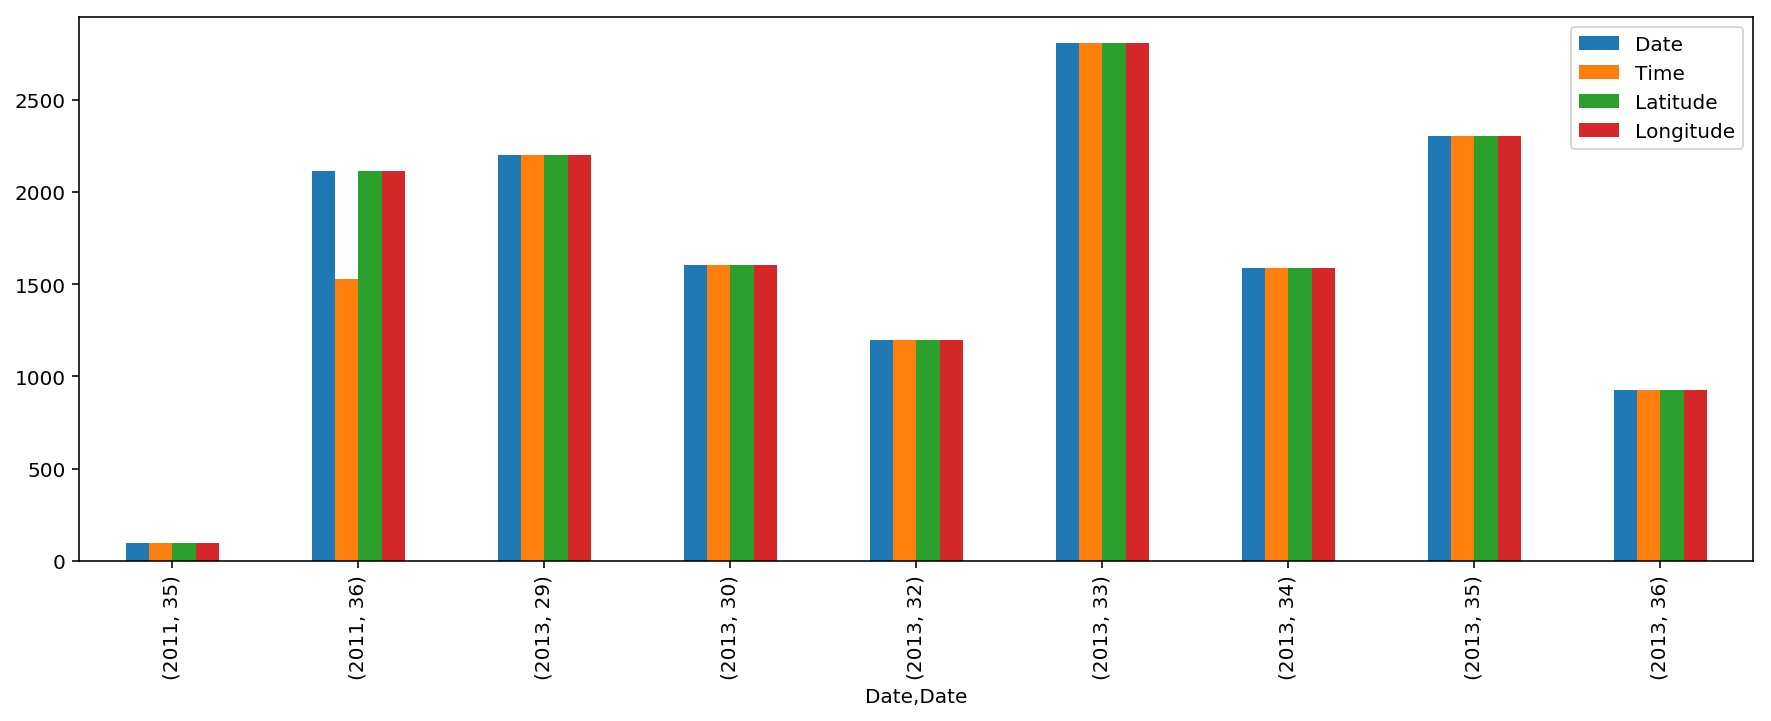

In [22]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'


spray.groupby([spray["Date"].dt.year,
               spray["Date"].dt.week]).count().plot(kind="bar",figsize=(15, 5))

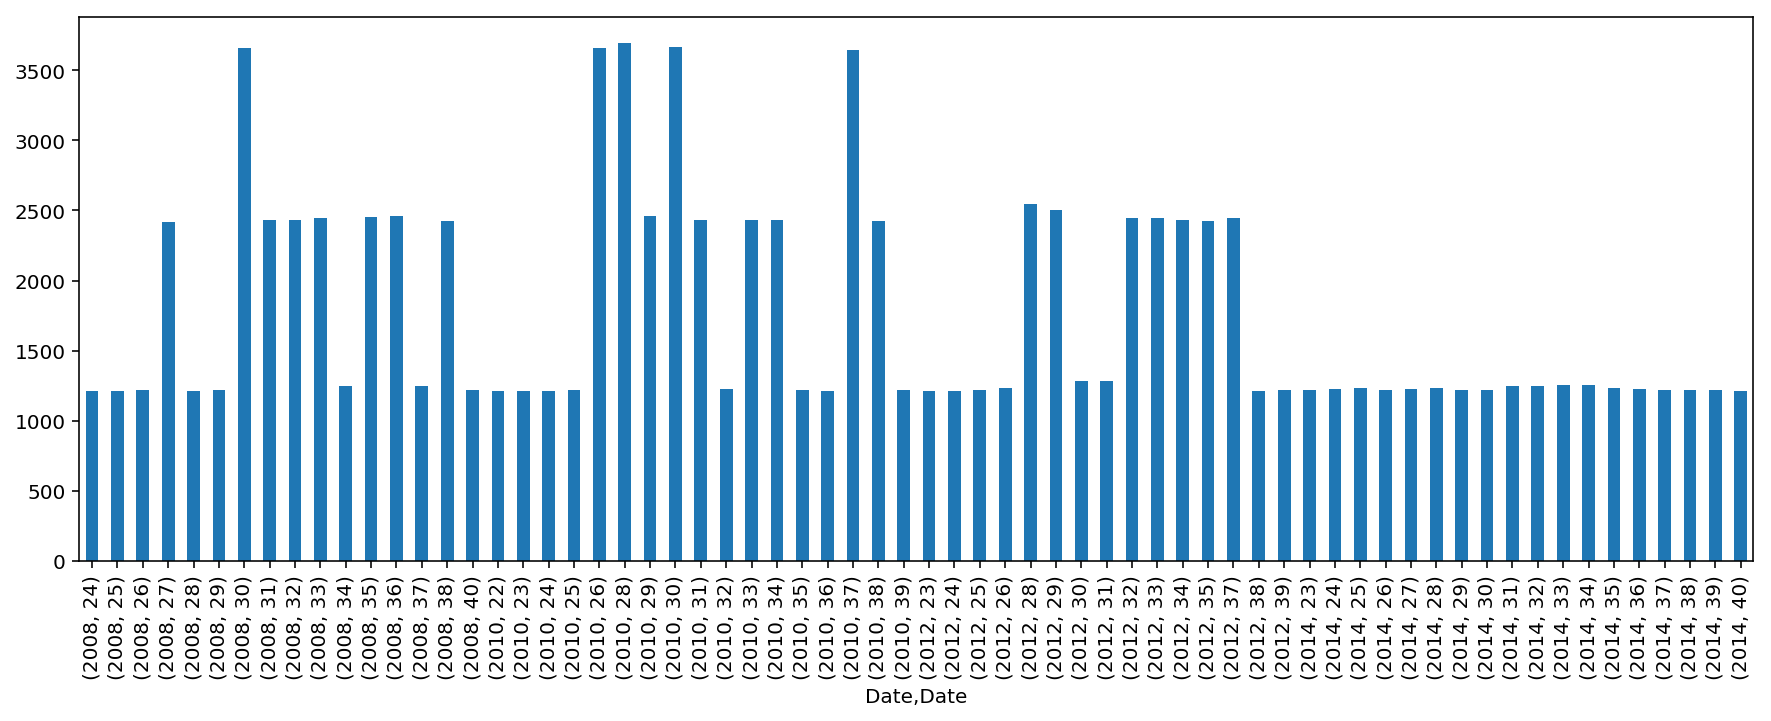

In [25]:
test = pd.read_csv('../input/test.csv')
test['Date'] = test.Date.astype('datetime64')

test['Id'].groupby([test["Date"].dt.year,
               test["Date"].dt.week]).count().plot(kind="bar",figsize=(15, 5))